## Plagiarism Detection, Feature Engineering

- building a plagiarism detector that examines a text file and performs binary classification to label whether that file is plagiarized or not
- depending on how similar the text file is when compared to a provided source text. 

- Your first task will be to create some features to train a classification model.
- This task will be broken down into a few discrete steps:

* Clean and pre-process the data.
* Define features for comparing the similarity of an answer text and a source text, and extract similarity features.
* Select "good" features, by analyzing the correlations between different features.
* Create train/test `.csv` files that hold the relevant features and class labels for train/test data points.

In [1]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c4147f9_data/data.zip
!unzip data

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
csv_file = 'data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

plagiarism_df.head()

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non


## Types of Plagiarism

- Each text file is associated with one **Task** (task A-E) and one **Category** of plagiarism which you can see in the above DataFrame.

##  Five task types, A-E

- Each text file contains an answer to one short question, these questions are labeled as tasks A-E.
- Each task A-E is about a topic that might be included in the Computer Science curriculum that was created by the authors of this dataset. 
- For example, Task A asks the question: "What is inheritance in object oriented programming?"

## Categories of plagiarism 

- Each text file has an associated plagiarism label/category:

**1. Plagiarized categories: `cut`, `light`, and `heavy`.**
* These categories represent different levels of plagiarized answer texts. `cut` answers copy directly from a source text, `light` answers are based on the source text but include some light rephrasing, and `heavy` answers are based on the source text, but *heavily* rephrased (and will likely be the most challenging kind of plagiarism to detect).
     
**2. Non-plagiarized category: `non`.** 
* `non` indicates that an answer is not plagiarized; the Wikipedia source text is not used to create this answer.
    
**3. Special, source text category: `orig`.**
* This is a specific category for the original, Wikipedia source text. We will use these files only for comparison purposes.

## Convert categorical to numerical data

- notice data contains string or categorical values, to prepare these for feature extraction we'll  convert these into numerical values.
- Additionally, our goal is to create a binary classifier so we need a binary class label that indicates whether an answer text is plagiarized (1) or not (0). 
- Complete the below function `numerical_dataframe` that reads in a `file_information.csv` file by name and returns a *new* DataFrame with a numerical `Category` column and a new `Class` column that labels each answer as plagiarized or not. 

- Your function should return a new DataFrame with the following properties:

* 4 columns: `File`, `Task`, `Category`, `Class`. The `File` and `Task` columns can remain unchanged from the original `.csv` file.
* Convert all `Category` labels to numerical labels according to the following rules (a higher value indicates a higher degree of plagiarism):
    * 0 = `non`
    * 1 = `heavy`
    * 2 = `light`
    * 3 = `cut`
    * -1 = `orig`, this is a special value that indicates an original file.
* For the new `Class` column
    * Any answer text that is not plagiarized (`non`) should have the class label `0`. 
    * Any plagiarized answer texts should have the class label `1`. 
    * And any `orig` texts will have a special label `-1`. 

## Expected output

After running your function, you should get a DataFrame with rows that looks like the following: 
```

        File	     Task  Category  Class
0	g0pA_taska.txt	a	  0   	0
1	g0pA_taskb.txt	b	  3   	1
2	g0pA_taskc.txt	c	  2   	1
3	g0pA_taskd.txt	d	  1   	1
4	g0pA_taske.txt	e	  0	   0
...
...
99   orig_taske.txt    e     -1      -1

```

In [4]:
def numerical_dataframe(csv_file='data/file_information.csv'):
    '''Reads in a csv file which is assumed to have `File`, `Category` and `Task` columns.
       This function does two things: 
       1) converts `Category` column values to numerical values 
       2) Adds a new, numerical `Class` label column.
       The `Class` column will label plagiarized answers as 1 and non-plagiarized as 0.
       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with numerical categories and a new `Class` label column'''
    
    df=pd.read_csv(csv_file)
    numeric_df=df.replace({'Category' : {'non':0, 'heavy':1,'light':2,'cut':3,'orig':-1}})
    numeric_df['Class']= df['Category'].replace({"non": 0, "heavy": 1, "light": 1, "cut": 1, "orig": -1})
    
    return numeric_df

In [5]:
transformed_df = numerical_dataframe(csv_file ='data/file_information.csv')
transformed_df.head(10)

,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0
5,g0pB_taska.txt,a,0,0
6,g0pB_taskb.txt,b,0,0
7,g0pB_taskc.txt,c,3,1
8,g0pB_taskd.txt,d,2,1
9,g0pB_taske.txt,e,1,1


In [6]:
import problem_unittests as tests

tests.test_numerical_df(numerical_dataframe)
transformed_df = numerical_dataframe(csv_file ='data/file_information.csv')

print('\nExample data: ')
transformed_df.head()

Tests Passed!

Example data: 


,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0


## Text Processing & Splitting Data

In [7]:
import helpers 

text_df = helpers.create_text_column(transformed_df)
text_df.head()

,File,Task,Category,Class,Text
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...


In [8]:
text_df.shape
#row =100 becoz 100 files

(100, 5)

In [9]:
row_idx = 0

sample_text = text_df.iloc[0]['Text']
print('Sample processed text:\n\n', sample_text)

Sample processed text:

 inheritance is a basic concept of object oriented programming where the basic idea is to create new classes that add extra detail to existing classes this is done by allowing the new classes to reuse the methods and variables of the existing classes and new methods and classes are added to specialise the new class inheritance models the is kind of relationship between entities or objects  for example postgraduates and undergraduates are both kinds of student this kind of relationship can be visualised as a tree structure where student would be the more general root node and both postgraduate and undergraduate would be more specialised extensions of the student node or the child nodes  in this relationship student would be known as the superclass or parent class whereas  postgraduate would be known as the subclass or child class because the postgraduate class extends the student class  inheritance can occur on several layers where if visualised would display a l

## Split data into training and test sets
- Stratified sampling

In [10]:
random_seed = 1

import helpers

complete_df = helpers.train_test_dataframe(text_df, random_seed=random_seed)
complete_df.head(10)

,File,Task,Category,Class,Text,Datatype
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...,train
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...,test
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...,train
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...,train
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...,train
5,g0pB_taska.txt,a,0,0,inheritance is a basic concept in object orien...,train
6,g0pB_taskb.txt,b,0,0,pagerank pr refers to both the concept and the...,train
7,g0pB_taskc.txt,c,3,1,vector space model is an algebraic model for r...,test
8,g0pB_taskd.txt,d,2,1,bayes theorem relates the conditional and marg...,train
9,g0pB_taske.txt,e,1,1,dynamic programming is a method for solving ma...,test


In [11]:
complete_df.shape

(100, 6)

## Similarity Features 

- One of the ways we might go about detecting plagiarism is by computing **similarity features** that measure how similar a given answer text is as compared to the original wikipedia source text (for a specific task, a-e). 
- The similarity features you will use are informed by [this paper on plagiarism detection](https://s3.amazonaws.com/video.udacity-data.com/topher/2019/January/5c412841_developing-a-corpus-of-plagiarised-short-answers/developing-a-corpus-of-plagiarised-short-answers.pdf). 

## Containment


$$ \frac{\sum{count(\text{ngram}_{A}) \cap count(\text{ngram}_{S})}}{\sum{count(\text{ngram}_{A})}} $$

## Create containment features

## Containment calculation

The general steps to complete this function are as follows:
1. From *all* of the text files in a given `df`, create an array of n-gram counts; it is suggested that you use a [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for this purpose.
2. Get the processed answer and source texts for the given `answer_filename`.
3. Calculate the containment between an answer and source text according to the following equation.

    >$$ \frac{\sum{count(\text{ngram}_{A}) \cap count(\text{ngram}_{S})}}{\sum{count(\text{ngram}_{A})}} $$
    
4. Return that containment value

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def calculate_containment(df, n, answer_filename):
    '''Calculates the containment between a given answer text and its associated source text.
       This function creates a count of ngrams (of a size, n) for each text file in our data.
       Then calculates the containment by finding the ngram count for a given answer text, 
       and its associated source text, and calculating the normalized intersection of those counts.
       :param df: A dataframe with columns,
           'File', 'Task', 'Category', 'Class', 'Text', and 'Datatype'
       :param n: An integer that defines the ngram size
       :param answer_filename: A filename for an answer text in the df, ex. 'g0pB_taskd.txt'
       :return: A single containment value that represents the similarity
           between an answer text and its source text.
    '''
    answer_text=df[df['File']==answer_filename]['Text'].values[0]
    answer_task=df[df['File']==answer_filename]['Task'].values[0]
    source_text=df[(df['Task']==answer_task) & (df['Category'] == -1)]['Text'].values[0]
    
    counts = CountVectorizer(analyzer='word', ngram_range=(n,n))
    vocab2int = counts.fit([answer_text, source_text]).vocabulary_
    ngrams = counts.fit_transform([answer_text, source_text])
    ngram_array = ngrams.toarray()
    intersection_list = np.amin(ngram_array, axis=0)
    intersection = np.sum(intersection_list)
    answer_idx = 0
    answer_cnt = np.sum(ngram_array[answer_idx])
    containment_val =  intersection / answer_cnt
    print(intersection,answer_cnt)

    return containment_val

In [14]:
n = 3

test_indices = range(5)

category_vals = []
containment_vals = []
for i in test_indices:
    category_vals.append(complete_df.loc[i, 'Category']) #row, column
    filename = complete_df.loc[i, 'File']
    c = calculate_containment(complete_df, n, filename)
    containment_vals.append(c)

print('Original category values: \n', category_vals)
print()
print(str(n)+'-gram containment values: \n', containment_vals)

2 214
188 195
135 220
29 185
6 189
Original category values: 
 [0, 3, 2, 1, 0]

3-gram containment values: 
 [0.009345794392523364, 0.9641025641025641, 0.6136363636363636, 0.15675675675675677, 0.031746031746031744]


In [17]:
tests.test_containment(complete_df, calculate_containment)

104 191
86 216
2 214
197 197
188 195
193 222
135 220
111 187
29 185
Tests Passed!


<br/>

##  Calculate the longest common subsequence

- calculate the *longest common subsequence* of words between a Student Answer Text and corresponding Wikipedia Source Text. 

- A Longest Common Subsequence (LCS) problem may look as follows:
* Given two texts: text A (answer text) of length n, and string S (original source text) of length m. 
- Our goal is to produce their longest common subsequence of words, the longest sequence of words that appear left-to-right in both texts (though the words don't have to be in continuous order).
* Consider:
    * A = "i think pagerank is a link analysis algorithm used by google that uses a system of weights attached to each element of a hyperlinked set of documents"
    * S = "pagerank is a link analysis algorithm used by the google internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents"

* In this case, we can see that the start of each sentence are fairly similar, having overlap in the sequence of words, "pagerank is a link analysis algorithm used by" before diverging slightly.

- Then we **continue moving left -to-right along both texts** until we see the next common sequence
- in this case it is only one word, "google". Next we find "that" and "a" and finally the same ending "to each element of a hyperlinked set of documents".

- 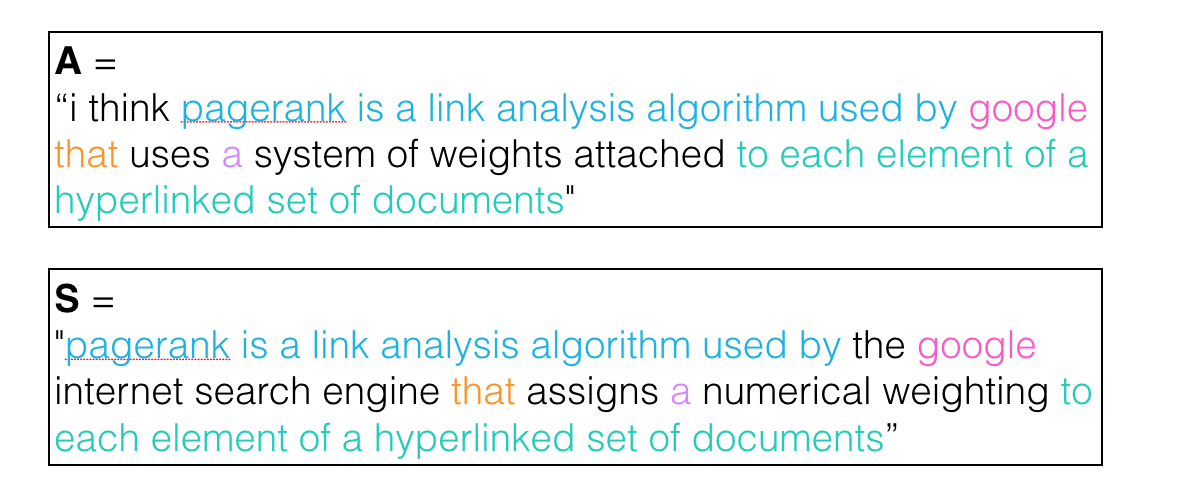

## The matrix rules
- you can efficiently fill up this matrix one cell at a time. 
- Each grid cell only depends on the values in the grid cells that are directly on top and to the left of it, or on the diagonal/top-left. The rules are as follows:
* Start with a matrix that has one extra row and column of zeros.
* As you traverse your string:
    * If there is a match, fill that grid cell with the value to the top-left of that cell *plus* one. So, in our case, when we found a matching B-B, we added +1 to the value in the top-left of the matching cell, 0.
    * If there is not a match, take the *maximum* value from either directly to the left or the top cell, and carry that value over to the non-match cell.

- 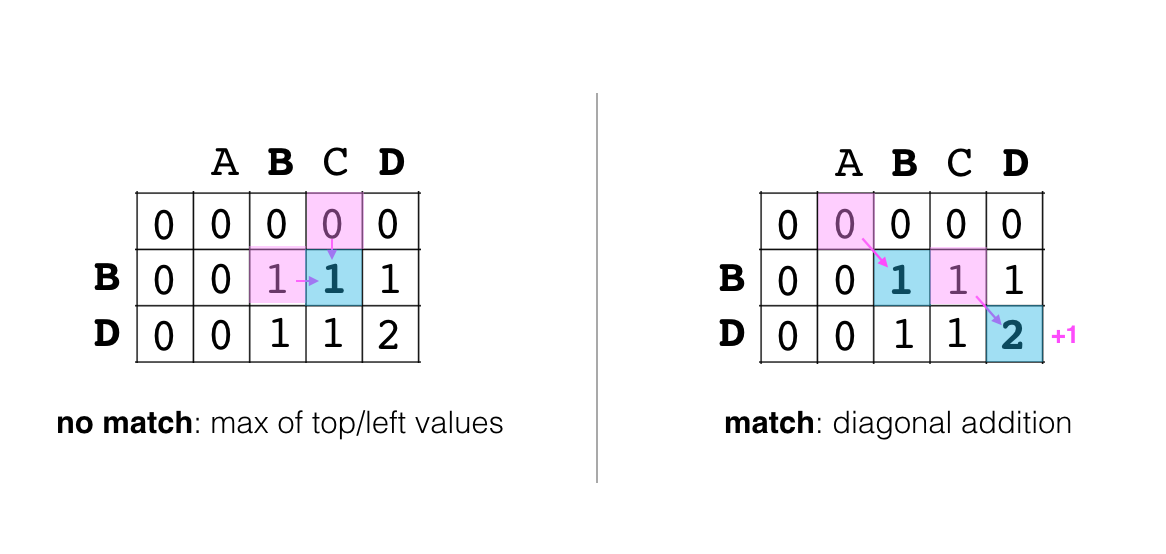
After completely filling the matrix, **the bottom-right cell will hold the non-normalized LCS value**.

This matrix treatment can be applied to a set of words instead of letters. Your function should apply this to the words in two texts and return the normalized LCS value.

In [18]:
# Compute the normalized LCS given an answer text and a source text
def lcs_norm_word(answer_text, source_text):
    '''Computes the longest common subsequence of words in two texts; returns a normalized value.
       :param answer_text: The pre-processed text for an answer text
       :param source_text: The pre-processed text for an answer's associated source text
       :return: A normalized LCS value'''
    
    answer_text_list = answer_text.split()
    source_text_list = source_text.split()    
    lcs_matrix = np.zeros((len(source_text_list) + 1, len(answer_text_list) + 1))
    for i, s_token in enumerate(source_text_list):
        for j, a_token in enumerate(answer_text_list):
            
            if s_token == a_token:
                lcs_matrix[i+1][j+1] = lcs_matrix[i][j] + 1
                
            else:
                lcs_matrix[i+1][j+1] = max(lcs_matrix[i][j+1], lcs_matrix[i+1][j])
    
    lcs = lcs_matrix[len(source_text_list)][len(answer_text_list)]
    normalized_lcs = lcs / len(answer_text_list)
    
    return normalized_lcs    

In [19]:
A = "i think pagerank is a link analysis algorithm used by google that uses a system of weights attached to each element of a hyperlinked set of documents"
S = "pagerank is a link analysis algorithm used by the google internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents"

lcs = lcs_norm_word(A, S)
print('LCS = ', lcs)


assert lcs==20/27., "Incorrect LCS value, expected about 0.7408, got "+str(lcs)

print('Test passed!')

LCS =  0.7407407407407407
Test passed!


In [20]:
tests.test_lcs(complete_df, lcs_norm_word)

Tests Passed!


In [21]:
test_indices = range(5) 

category_vals = []
lcs_norm_vals = []
for i in test_indices:
    category_vals.append(complete_df.loc[i, 'Category'])
    answer_text = complete_df.loc[i, 'Text'] 
    task = complete_df.loc[i, 'Task']
    orig_rows = complete_df[(complete_df['Class'] == -1)]
    orig_row = orig_rows[(orig_rows['Task'] == task)]
    source_text = orig_row['Text'].values[0]
    
    lcs_val = lcs_norm_word(answer_text, source_text)
    lcs_norm_vals.append(lcs_val)

print('Original category values: \n', category_vals)
print()
print('Normalized LCS values: \n', lcs_norm_vals)

Original category values: 
 [0, 3, 2, 1, 0]

Normalized LCS values: 
 [0.1917808219178082, 0.8207547169811321, 0.8464912280701754, 0.3160621761658031, 0.24257425742574257]


## Creating multiple containment features

In [22]:
def create_containment_features(df, n, column_name=None):
    
    containment_values = []
    
    if(column_name==None):
        column_name = 'c_'+str(n) # c_1, c_2, .. c_n
    
    for i in df.index:
        file = df.loc[i, 'File']
        if df.loc[i,'Category'] > -1:
            c = calculate_containment(df, n, file)
            containment_values.append(c)
        else:
            containment_values.append(-1)
    
    print(str(n)+'-gram containment features created!')
    return containment_values

## Creating LCS features

In [23]:
def create_lcs_features(df, column_name='lcs_word'):
    
    lcs_values = []
    
    for i in df.index:
        if df.loc[i,'Category'] > -1:
            answer_text = df.loc[i, 'Text'] 
            task = df.loc[i, 'Task']
            orig_rows = df[(df['Class'] == -1)]
            orig_row = orig_rows[(orig_rows['Task'] == task)]
            source_text = orig_row['Text'].values[0]

            lcs = lcs_norm_word(answer_text, source_text)
            lcs_values.append(lcs)
        else:
            lcs_values.append(-1)

    print('LCS features created!')
    return lcs_values
    

##  Create a features DataFrame by selecting an `ngram_range`

In [24]:
ngram_range = range(1,7)
features_list = []

all_features = np.zeros((len(ngram_range)+1, len(complete_df)))

i=0
for n in ngram_range:
    column_name = 'c_'+str(n)
    features_list.append(column_name)
    all_features[i]=np.squeeze(create_containment_features(complete_df, n)) #this part
    i+=1

features_list.append('lcs_word')
all_features[i]= np.squeeze(create_lcs_features(complete_df))

features_df = pd.DataFrame(np.transpose(all_features), columns=features_list)

print()
print('Features: ', features_list)
print()

86 216
197 197
193 222
111 187
104 191
86 261
134 227
225 294
136 179
199 225
117 189
96 186
82 186
143 146
137 144
166 170
69 75
138 170
15 34
44 90
271 273
70 86
44 72
26 63
92 92
93 201
123 194
123 211
148 232
111 191
66 157
111 190
163 237
113 167
230 299
151 212
160 254
64 113
65 135
141 197
87 262
175 244
202 230
160 302
119 208
78 244
106 200
119 192
212 230
262 262
156 200
109 167
99 223
135 203
150 206
253 332
143 151
42 114
81 152
107 173
99 194
168 195
201 321
261 261
138 238
81 199
150 291
121 207
79 128
131 131
119 120
98 178
39 93
76 91
89 96
76 198
104 211
146 206
158 183
317 330
275 275
97 158
53 121
250 257
233 242
146 199
111 216
98 236
105 216
202 239
97 200
212 223
113 205
69 191
124 233
1-gram containment features created!
17 215
193 196
159 221
50 186
22 190
14 260
34 226
208 293
90 178
118 224
47 188
13 185
22 185
133 145
114 143
145 169
50 74
94 169
1 33
6 89
268 272
57 85
11 71
7 62
91 91
14 200
39 193
61 210
99 231
27 190
12 156
27 189
96 236
53 166
159 298
80

In [25]:
features_df.head(10)

,c_1,c_2,c_3,c_4,c_5,c_6,lcs_word
0,0.398148,0.079070,0.009346,0.000000,0.000000,0.000000,0.191781
1,1.000000,0.984694,0.964103,0.943299,0.922280,0.901042,0.820755
2,0.869369,0.719457,0.613636,0.515982,0.449541,0.382488,0.846491
3,0.593583,0.268817,0.156757,0.108696,0.081967,0.060440,0.316062
4,0.544503,0.115789,0.031746,0.005319,0.000000,0.000000,0.242574
5,0.329502,0.053846,0.007722,0.003876,0.000000,0.000000,0.161172
6,0.590308,0.150442,0.035556,0.004464,0.000000,0.000000,0.301653
7,0.765306,0.709898,0.664384,0.625430,0.589655,0.553633,0.621711
8,0.759777,0.505618,0.395480,0.306818,0.245714,0.195402,0.484305
9,0.884444,0.526786,0.340807,0.247748,0.180995,0.150000,0.597458


## Correlated Features

In [26]:
corr_matrix = features_df.corr().abs().round(2)
display(corr_matrix)

,c_1,c_2,c_3,c_4,c_5,c_6,lcs_word
c_1,1.00,0.94,0.90,0.89,0.88,0.87,0.97
c_2,0.94,1.00,0.99,0.98,0.97,0.96,0.98
c_3,0.90,0.99,1.00,1.00,0.99,0.98,0.97
c_4,0.89,0.98,1.00,1.00,1.00,0.99,0.95
c_5,0.88,0.97,0.99,1.00,1.00,1.00,0.95
c_6,0.87,0.96,0.98,0.99,1.00,1.00,0.94
lcs_word,0.97,0.98,0.97,0.95,0.95,0.94,1.00


## Create selected train/test data

In [33]:
def train_test_data(complete_df, features_df, selected_features):
    '''Gets selected training and test features from given dataframes, and 
       returns tuples for training and test features and their corresponding class labels.
       :param complete_df: A dataframe with all of our processed text data, datatypes, and labels
       :param features_df: A dataframe of all computed, similarity features
       :param selected_features: An array of selected features that correspond to certain columns in `features_df`
       :return: training and test features and labels: (train_x, train_y), (test_x, test_y)'''
    
    combined_df = pd.concat([complete_df, features_df], axis=1)
    
    train_x = combined_df[combined_df['Datatype']=='train'][selected_features].values
    train_y = combined_df[combined_df['Datatype']=='train']['Class'].values

    test_x = combined_df[combined_df['Datatype']=='test'][selected_features].values
    test_y = combined_df[combined_df['Datatype']=='test']['Class'].values
    
    return (train_x, train_y), (test_x, test_y)
    

In [29]:
combined_df = pd.concat([complete_df, features_df], axis=1)
combined_df.head()

,File,Task,Category,Class,Text,Datatype,c_1,c_2,c_3,c_4,c_5,c_6,lcs_word
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...,train,0.398148,0.079070,0.009346,0.000000,0.000000,0.000000,0.191781
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...,test,1.000000,0.984694,0.964103,0.943299,0.922280,0.901042,0.820755
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...,train,0.869369,0.719457,0.613636,0.515982,0.449541,0.382488,0.846491
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...,train,0.593583,0.268817,0.156757,0.108696,0.081967,0.060440,0.316062
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...,train,0.544503,0.115789,0.031746,0.005319,0.000000,0.000000,0.242574


## Test cells



In [36]:
test_selection = list(features_df)[:2]
(train_x, train_y), (test_x, test_y) = train_test_data(complete_df, features_df, test_selection)

tests.test_data_split(train_x, train_y, test_x, test_y)

Tests Passed!


##  Select "good" features

In [37]:
selected_features = ['c_1', 'c_5', 'lcs_word']
(train_x, train_y), (test_x, test_y) = train_test_data(complete_df, features_df, selected_features)

print('Training size: ', len(train_x))
print('Test size: ', len(test_x))
print()
print('Training df sample: \n', train_x[:10])

Training size:  70
Test size:  25

Training df sample: 
 [[0.39814815 0.         0.19178082]
 [0.86936937 0.44954128 0.84649123]
 [0.59358289 0.08196721 0.31606218]
 [0.54450262 0.         0.24257426]
 [0.32950192 0.         0.16117216]
 [0.59030837 0.         0.30165289]
 [0.75977654 0.24571429 0.48430493]
 [0.51612903 0.         0.27083333]
 [0.44086022 0.         0.22395833]
 [0.97945205 0.78873239 0.9       ]]


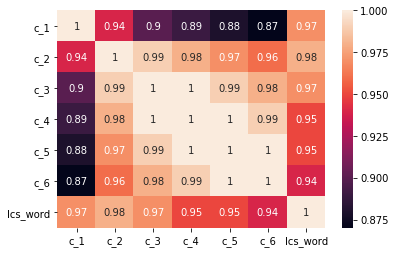

In [43]:
import seaborn as sns
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)

## Creating Final Data Files
- Create csv files

In [44]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    df_x=pd.DataFrame(x)
    df_y=pd.DataFrame(y)
    
    final_train_df=pd.concat([df_y,df_x], axis=1)
    final_train_df.to_csv(os.path.join(data_dir, filename), header=False, index=False)
    
    print('Path created: '+str(data_dir)+'/'+str(filename))

### Test cells

In [45]:
fake_x = [ [0.39814815, 0.0001, 0.19178082], 
           [0.86936937, 0.44954128, 0.84649123], 
           [0.44086022, 0., 0.22395833] ]

fake_y = [0, 1, 1]

make_csv(fake_x, fake_y, filename='to_delete.csv', data_dir='test_csv')

fake_df = pd.read_csv('test_csv/to_delete.csv', header=None)

assert fake_df.shape==(3, 4), \
      'The file should have as many rows as data_points and as many columns as features+1 (for indices).'
assert np.all(fake_df.iloc[:,0].values==fake_y), 'First column is not equal to the labels, fake_y.'
print('Tests passed!')

Path created: test_csv/to_delete.csv
Tests passed!


In [46]:
! rm -rf test_csv

In [47]:
data_dir = 'plagiarism_data'

make_csv(train_x, train_y, filename='train.csv', data_dir=data_dir)
make_csv(test_x, test_y, filename='test.csv', data_dir=data_dir)

Path created: plagiarism_data/train.csv
Path created: plagiarism_data/test.csv


## Load Data to S3

In [1]:
import pandas as pd
import boto3
import sagemaker

In [2]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

bucket = sagemaker_session.default_bucket()

## Upload training data to S3


In [3]:
data_dir = "plagiarism_data"
prefix = "plagiarism-data"

input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)
input_data

's3://sagemaker-us-west-2-976575622760/plagiarism-data'

## Defining and training a model

In [31]:
!pygmentize source_pytorch/train.py

import argparse
import json
import os
import pandas as pd
import torch
import torch.optim as optim
import torch.utils.data

# imports the model in model.py by name
from model import BinaryClassifier

def model_fn(model_dir):
    """Load the PyTorch model from the `model_dir` directory."""
    print("Loading model.")

    # First, load the parameters used to create the model.
    model_info = {}
    model_info_path = os.path.join(model_dir, 'model_info.pth')
    with open(model_info_path, 'rb') as f:
        model_info = torch.load(f)

    print("model_info: {}".format(model_info))

    # Determine the device and construct the model.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BinaryClassifier(model_info['input_dim'], model_info['hidden_dim'], model_info['output_dim'])
    #notice the hyperparameter names should match


    # Load the stored model parameters.
    model_path = os.path.join(model_dir, 'model.pth')
    with open(model_path, 'rb') a

            'hidden_dim': args.hidden_dim,
            'output_dim': args.output_dim
        }
        torch.save(model_info, f)
        
    ## --- End of your code  --- ##
    

	# Save the model parameters
    model_path = os.path.join(args.model_dir, 'model.pth')
    with open(model_path, 'wb') as f:
        torch.save(model.cpu().state_dict(), f)


## Create an Estimator

In [15]:
from sagemaker.pytorch import PyTorch

output_path = 's3://{}/{}'.format(bucket, prefix)
output_path

's3://sagemaker-us-west-2-976575622760/plagiarism-data'

In [47]:
estimator = PyTorch(entry_point='train.py',
                    source_dir='source_pytorch', 
                    role=role,
                    framework_version='1.0',
                    train_instance_count=1,
                    train_instance_type='ml.c4.xlarge',
                    output_path=output_path,
                    sagemaker_session=sagemaker_session,
                    hyperparameters={ 
                        'input_dim': 3, 
                        'hidden_dim': 20,
                        'output_dim': 1, 
                        'epochs': 160 
                    })

##  Train the estimator

In [48]:
%%time

estimator.fit({'train': input_data})

2019-08-22 16:58:35 Starting - Starting the training job...
2019-08-22 16:58:41 Starting - Launching requested ML instances......
2019-08-22 16:59:44 Starting - Preparing the instances for training...
2019-08-22 17:00:27 Downloading - Downloading input data...
2019-08-22 17:00:49 Training - Downloading the training image..
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2019-08-22 17:01:08,156 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2019-08-22 17:01:08,159 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2019-08-22 17:01:08,171 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2019-08-22 17:01:09,588 sagemaker_pytorch_container.training INFO     Invoking user training script.
2019-08-22 17:01:09,838 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2019-08-22 17:01:09,83


2019-08-22 17:01:23 Uploading - Uploading generated training model
2019-08-22 17:01:23 Completed - Training job completed
Billable seconds: 57
CPU times: user 455 ms, sys: 0 ns, total: 455 ms
Wall time: 3min 11s


## Deploy the trained model

In [49]:
from sagemaker.pytorch import PyTorchModel

model = PyTorchModel(model_data=estimator.model_data, #pass trained model data
                     role = role,
                     framework_version='1.0',
                     entry_point='predict.py', 
                     source_dir='source_pytorch')

In [50]:
%%time
predictor = model.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

--------------------------------------------------------------------------------------------------!CPU times: user 726 ms, sys: 29.6 ms, total: 755 ms
Wall time: 8min 16s


## Evaluating Model

In [51]:
import os

test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)

test_y = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

## Determine accuracy of  model

In [52]:
test_y_preds = predictor.predict(test_x)

assert len(test_y_preds)==len(test_y), 'Unexpected number of predictions.'
print('Test passed!')

Test passed!


In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, test_y_preds)
print(accuracy)


print('\nPredicted class labels: ')
print(test_y_preds)
print('\nTrue class labels: ')
print(test_y.values)

0.96

Predicted class labels: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]

True class labels: 
[1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]


## Clean up Resources

In [55]:
predictor.delete_endpoint()

## Deleting S3 bucket

In [56]:
# deleting bucket, uncomment lines below

bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

[{'ResponseMetadata': {'RequestId': 'F59CA57682BB31FA',
   'HostId': 'g47FlOEJcwHRmVQIx6kRkIo6TNye8riiaOMig7aTY4fXgTAk51wluo0mEvPa0RIz4oP7nHR5yYk=',
   'HTTPStatusCode': 200,
   'HTTPHeaders': {'x-amz-id-2': 'g47FlOEJcwHRmVQIx6kRkIo6TNye8riiaOMig7aTY4fXgTAk51wluo0mEvPa0RIz4oP7nHR5yYk=',
    'x-amz-request-id': 'F59CA57682BB31FA',
    'date': 'Thu, 22 Aug 2019 17:14:43 GMT',
    'connection': 'close',
    'content-type': 'application/xml',
    'transfer-encoding': 'chunked',
    'server': 'AmazonS3'},
   'RetryAttempts': 0},
  'Deleted': [{'Key': 'sagemaker-pytorch-2019-08-20-11-03-16-232/source/sourcedir.tar.gz'},
   {'Key': 'creditcard/linear-learner-2019-08-20-04-20-12-239/output/model.tar.gz'},
   {'Key': 'sagemaker-record-sets/PCA-2019-08-19-07-58-30-515/matrix_0.pbr'},
   {'Key': 'sagemaker-record-sets/PCA-2019-08-19-14-16-00-423/.amazon.manifest'},
   {'Key': 'sagemaker-pytorch-2019-08-20-14-44-21-747/source/sourcedir.tar.gz'},
   {'Key': 'sagemaker-pytorch-2019-08-19-08-02-37-55